# Overview 

In the 10x series of notebooks, we will look at Time Series modeling in pycaret using univariate data and no exogenous variables. We will use the famous airline dataset for illustration. Our plan of action is as follows:

1. Perform EDA on the dataset to extract valuable insight about the process generating the time series. **(COMPLETED)**
2. Model the dataset based on exploratory analysis (univariable model without exogenous variables). **(Covered in this notebook)**
3. Use an automated approach (AutoML) to improve the performance.

In [1]:
# Only enable critical logging (Optional)
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [2]:
def what_is_installed():
    from pycaret import show_versions
    show_versions()

try:
    what_is_installed()
except ModuleNotFoundError:
    !pip install pycaret
    what_is_installed()


System:
    python: 3.9.16 (main, Jan 11 2023, 16:16:36) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Nikhil\.conda\envs\pycaret_dev_sktime_16p1\python.exe
   machine: Windows-10-10.0.19044-SP0

PyCaret required dependencies:
                 pip: 22.3.1
          setuptools: 65.6.3
             pycaret: 3.0.0rc9
             IPython: 8.10.0
          ipywidgets: 8.0.4
                tqdm: 4.64.1
               numpy: 1.23.5
              pandas: 1.5.3
              jinja2: 3.1.2
               scipy: 1.10.0
              joblib: 1.2.0
             sklearn: 1.2.1
                pyod: 1.0.8
            imblearn: 0.10.1
   category_encoders: 2.6.0
            lightgbm: 3.3.5
               numba: 0.56.4
            requests: 2.28.2
          matplotlib: 3.7.0
          scikitplot: 0.3.7
         yellowbrick: 1.5
              plotly: 5.13.0
             kaleido: 0.2.1
         statsmodels: 0.13.5
              sktime: 0.16.1
               tbats: 1.1.2
            pmdarima: 2.0.2


In [3]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [4]:
y = get_data('airline', verbose=False)

In [5]:
# We want to forecast the next 12 months of data and we will use 3 fold cross-validation to test the models.
fh = 12 # or alternately fh = np.arange(1,13)
fold = 3

In [6]:
# Global Figure Settings for notebook ----
# Depending on whether you are using jupyter notebook, jupyter lab, Google Colab, you may have to set the renderer appropriately
# NOTE: Setting to a static renderer here so that the notebook saved size is reduced.
fig_kwargs = {
    # "renderer": "notebook",
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [7]:
exp = TSForecastingExperiment()
exp.setup(data=y, fh=fh, fig_kwargs=fig_kwargs)

,Description,Value
0,session_id,4747
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


# Available Models

`pycaret` Time Series Forecasting module has a rich set of models ranging from traditional statistical models such as ARIMA, Exponential Smoothing, ETS, etc to [Reduced Regression Models](https://github.com/pycaret/pycaret/discussions/1760)

In [8]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


# Modeling (Manual)

In our exploratory analysis, we found that the characteristics of the data meant that we need to difference the data once and take a seasonal difference with period = 12. We also concluded that some autoregressive properties still need to be taken care of after doing this. 

More specifically, if we were building an ARIMA model, we would start with **ARIMA(1,1,0)x(0,1,0,12)**. Let's build this next.

In [9]:
exp = TSForecastingExperiment()
exp.setup(data=y, fh=fh, fold=fold, fig_kwargs=fig_kwargs, session_id=42)

,Description,Value
0,session_id,42
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


**Note:**

The `setup` provides some useful information out of the box.

1. Seasonal period of 12 was tested and seasonality was detected at this period. This is what will be used in subsequent modeling automatically.
2. The data splits are also shown - 132 data points for the training dataset and 12 data points for the test dataset.
3. The training dataset will be cross validated using 3 folds.  


## ARIMA Model

**NOTE**:

1. Specific model hyperparameters can be passed as kwargs to the model. 
2. All models in the time series module are are based on the `sktime` package.
2. More details about creating and customizing time series models in pycaret can be found here: https://github.com/pycaret/pycaret/discussions/1757


In [10]:
model = exp.create_model("arima", order=(1,1,0), seasonal_order=(0,1,0,12))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3535,0.4103,10.3216,13.4315,0.0255,0.0260,0.9413
1,1957-12,0.6844,0.6853,20.9235,23.2653,0.0581,0.0560,0.8582
2,1958-12,1.5988,1.4673,45.6850,47.6955,0.1066,0.1132,0.4911
Mean,NaT,0.8789,0.8543,25.6434,28.1308,0.0634,0.0651,0.7635
SD,NaT,0.5267,0.4477,14.8178,14.4051,0.0333,0.0362,0.1956


**NOTE:**
* `create_model` will highlight the cross validation scores across the folds. The time cutoff for each fold is also displayes for convenience. Users may wish to correlate this cutoff with what they get from `plot_model(plot="cv")`.

* `create_model` retrains the model on the entire dataset after performing cross validation.  This allows us to check the performance of the model against the test set simply by using `predict_model`

In [11]:
# Out-of-sample Forecasts
y_predict = exp.predict_model(model)
y_predict

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.6999,0.7757,21.3121,26.7998,0.0480,0.0462,0.8703


,y_pred
1960-01,424.7154
1960-02,408.1599
1960-03,472.4447
1960-04,463.0139
1960-05,487.5134
1960-06,540.0299
1960-07,616.5423
1960-08,628.0557
1960-09,532.5688
1960-10,477.0820


The scores listed above are for the test set. We can see that the metrics are actually slightly better than the mean Cross validation score which implies that we have not overfit the model. More details about this can be found in **[this article](https://towardsdatascience.com/bias-variance-tradeoff-in-time-series-8434f536387a)**.

In a previous notebook, we saw that `plot_model` without an estimator argument works on the original dataset. In addition, by passing the model (`estimator`) to the `plot_model` call, we can plot model diagnostics as well.

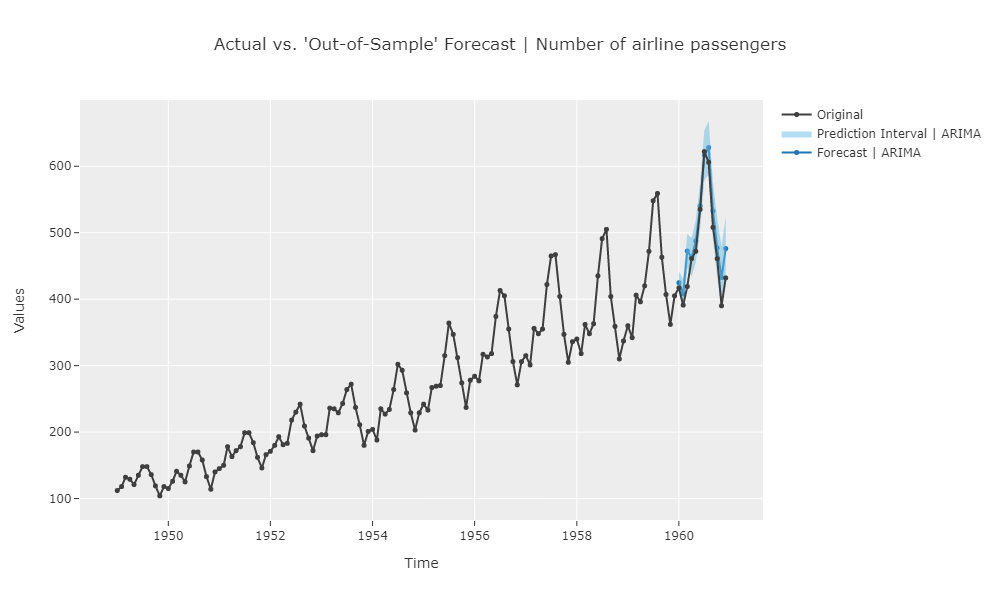

In [12]:
# Plot the out-of-sample forecasts
exp.plot_model(estimator=model)

# # Alternately the following will plot the same thing.
# exp.plot_model(estimator=model, plot="forecast")

**NOTE:** 
* `predict_model` is intelligent enough to understand the current state of the model (i.e. it is only trained using the _train_ dataset).
* Since the model has only been trained on the _train_ set so far, the predictions are made for the _test_ set.
* Later, we will see that once the model is finalized (trained on the complete _train + test_ set), `predict_model` automatically makes the true future predictions automatically.
* Also note that if the model supports prediction intervals, they are plotted by default for convenience.

Next, let's check the goodness of fit using both diagnostic plots as well as statistical tests. Similar to plot_model, passing an estimator to the `check_stats` call will perform the tests on the model residuals.

In [13]:
# Check Goodness of Fit
exp.check_stats(model)

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Residual,Length,,131.0
1,Summary,Statistics,Residual,# Missing Values,,0.0
2,Summary,Statistics,Residual,Mean,,-0.445207
3,Summary,Statistics,Residual,Median,,-0.9606
4,Summary,Statistics,Residual,Standard Deviation,,11.759243
5,Summary,Statistics,Residual,Variance,,138.27979
6,Summary,Statistics,Residual,Kurtosis,,4.244741
7,Summary,Statistics,Residual,Skewness,,-0.938657
8,Summary,Statistics,Residual,# Distinct Values,,127.0
9,White Noise,Ljung-Box,Residual,Test Statistic,"{'alpha': 0.05, 'K': 24}",21.29991


**Observations**

1. Stationarity tests indicate that the residuals are stationary. 
2. The white noise test indicates that the residuals are consistent with white noise. 

This indicates that we have done a good job of extracting most of the signal from the time series data.

Next, we can plot the diagnostics on the residuals just like we did it on the original dataset.

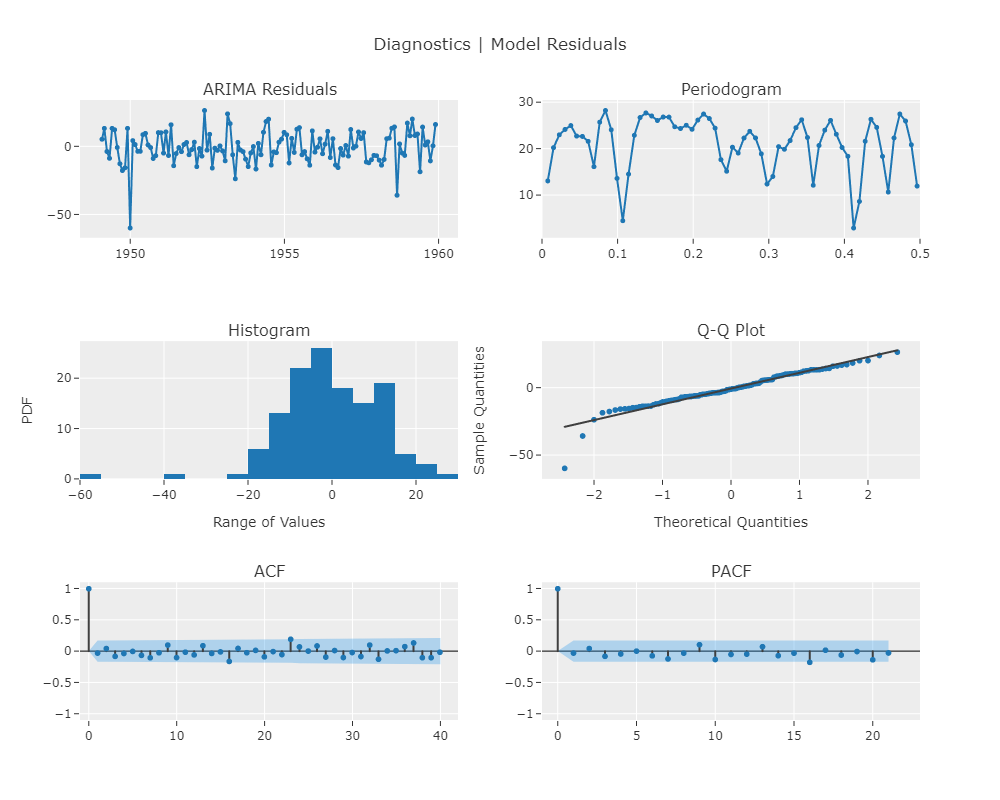

In [14]:
exp.plot_model(model, plot='diagnostics', fig_kwargs={"height": 800, "width": 1000})

**Observations**

1. The ACF and PACF indicate that we have captured most of the autocorelation in the data. There is no serial autocorrelation left in the data to capture.
2. The histogram and QQ plot do indicate some left skewness, but overall the results are satisfactory.

**NOTE:**

These plots can be obtained individually as well if needed using the following calls

* `exp.plot_model(model, plot='residuals')`
* `exp.plot_model(model, plot='acf')`
* `exp.plot_model(model, plot='pacf')`
* `exp.plot_model(model, plot='periodogram')`

**Another useful plot is the `insample` plot** which shows the model fit to the actual data. 

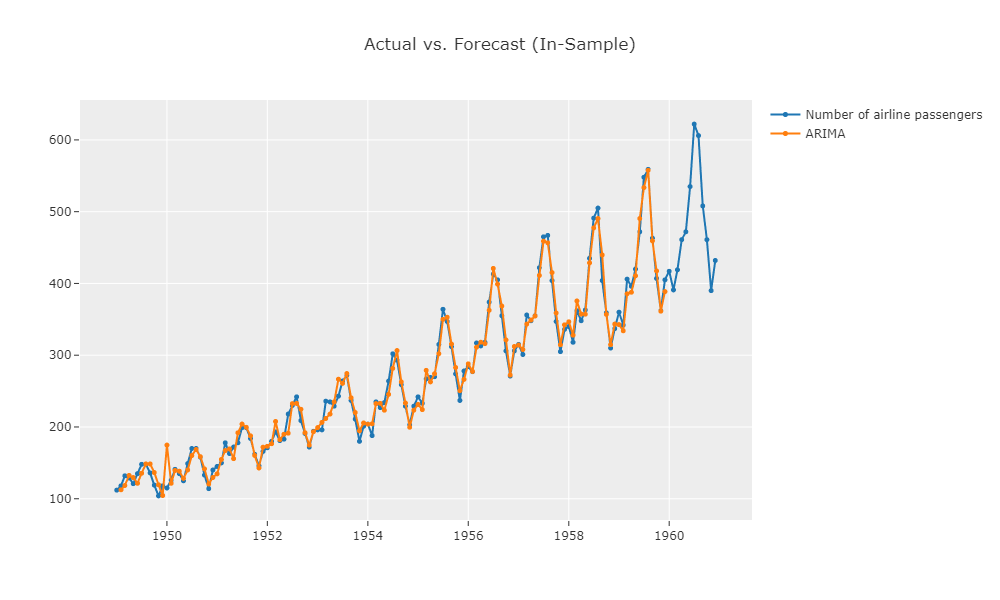

In [15]:
exp.plot_model(model, plot='insample')

We could also check the decomposition of the residuals to see if 

1. The residual in the decomposition the largest component?
2. there is any any visible trend or seasonality component that has not been captured in the model?

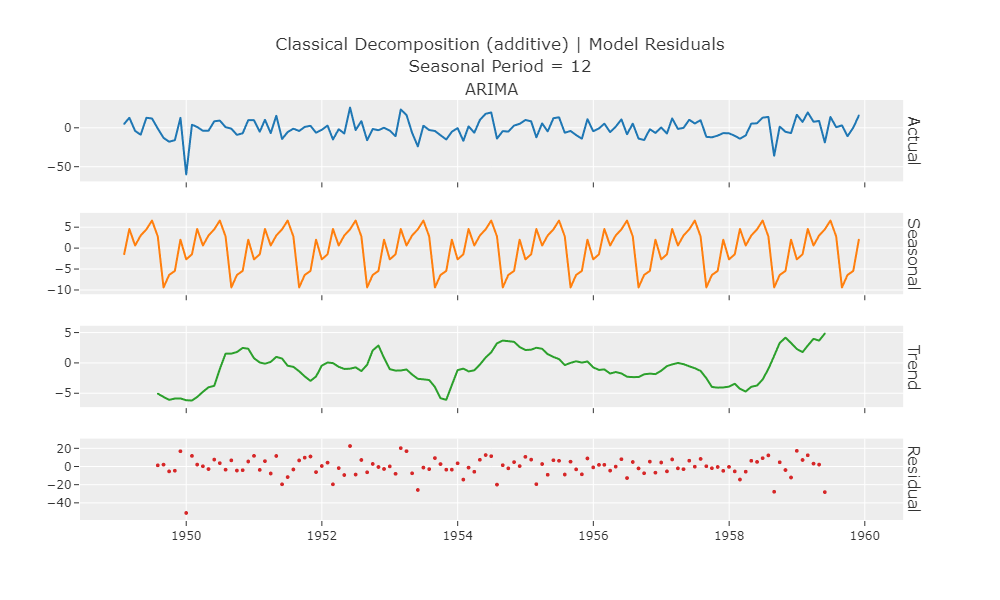

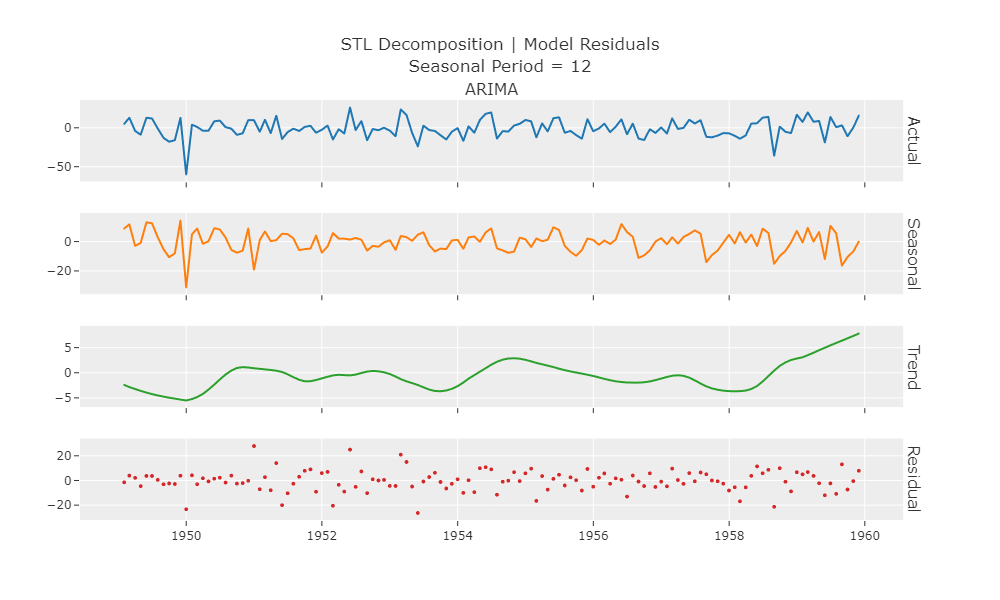

In [16]:
exp.plot_model(model, plot="decomp")
exp.plot_model(model, plot="decomp_stl")

### Reduced Regressors: LightGBM (with internal conditional deseasonalize and detrending)

We noted above that we could use regression models for time series data as well by converting them into an appropriate format (reduced regression models). Let's see one of these in action. We will use the LightGBM regressor for this. Reduced regression models in pycaret will also detrend and conditionally deseasonalize the data to make it easier for the regression model to capture the autoregressive properties of the data.

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.7545,0.9171,22.0339,30.0192,0.0538,0.0562,0.7067
1,1957-12,0.8044,0.8105,24.5938,27.5155,0.0646,0.0634,0.8017
2,1958-12,0.8880,1.0076,25.3731,32.7521,0.0543,0.0565,0.7600
Mean,NaT,0.8156,0.9117,24.0002,30.0956,0.0575,0.0587,0.7561
SD,NaT,0.0551,0.0805,1.4264,2.1385,0.0050,0.0034,0.0389


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LGBMRegressor,0.8837,0.9749,26.9090,33.6827,0.0531,0.0549,0.7952


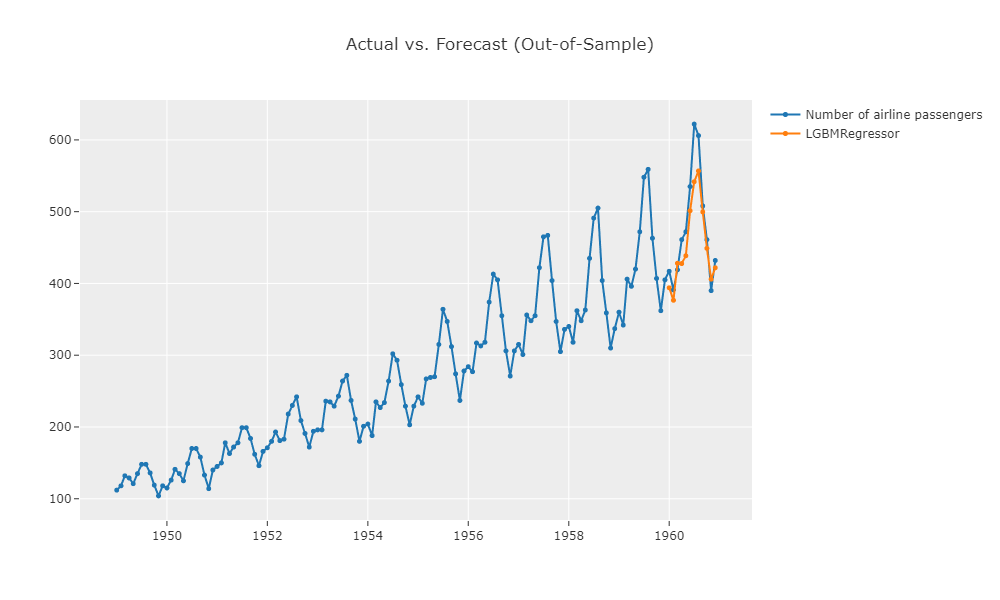

In [17]:
model = exp.create_model("lightgbm_cds_dt")
y_predict = exp.predict_model(model)
exp.plot_model(estimator=model)

**Observations:**
    
1. The overall cross validation metrics are comparable to the ARIMA model, but the forecasts on test data are not good. 

We may wish to tune the hyperparameters of the model to see if we can improve the performance.

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3579,0.4283,10.4519,14.0196,0.0263,0.0265,0.9360
1,1957-12,1.0488,1.0486,32.0663,35.5979,0.0900,0.0852,0.6680
2,1958-12,0.4800,0.5406,13.7143,17.5717,0.0322,0.0318,0.9309
Mean,NaT,0.6289,0.6725,18.7442,22.3964,0.0495,0.0478,0.8450
SD,NaT,0.3011,0.2699,9.5138,9.4468,0.0288,0.0265,0.1252


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.6s finished


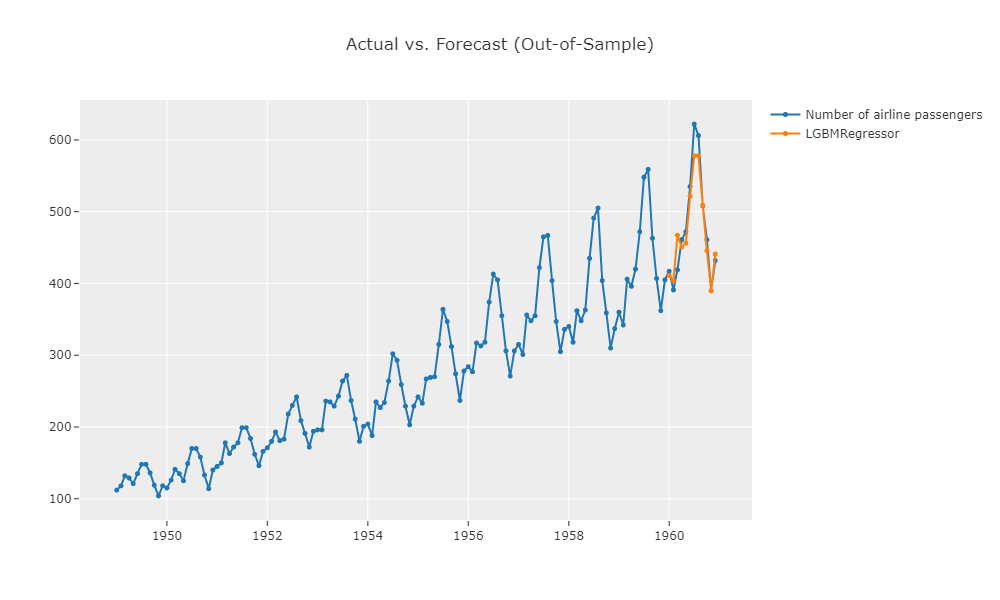

In [18]:
# Random Grid Search
tuned_model = exp.tune_model(model)
exp.plot_model(estimator=tuned_model)

In [19]:
print(model)
print(tuned_model)

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(random_state=42), sp=12,
                    window_length=12)
BaseCdsDtForecaster(degree=2, deseasonal_model='multiplicative',
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                           

This is much better than before in terms of metrics as well as the comparison to the test data. We can even compare the model performance visually.

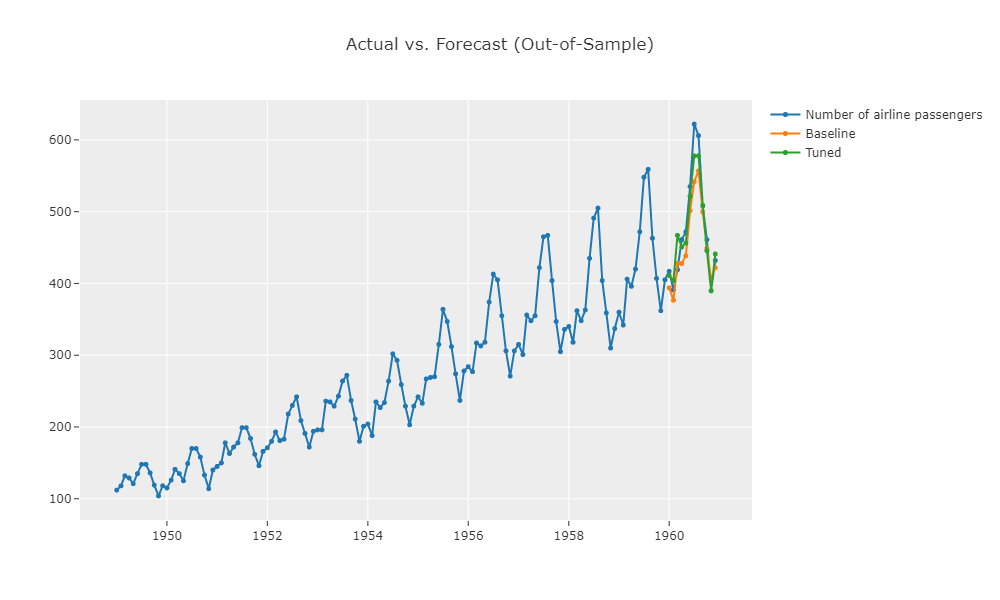

In [20]:
exp.plot_model([model, tuned_model], data_kwargs={"labels": ["Baseline", "Tuned"]})

## Getting Ready for Production

So now we have built 2 models manually. We can not put one of them into production. Let's pick the Reduced regression model for this. 

Before, we can use this model for making future predictions, we need to finalize this. This step will take the model from the previous stage and without changing the model hyperparameters, train the model on the entire _train + test_ dataset so that we can make true future forecasts.

### Finalizing Models

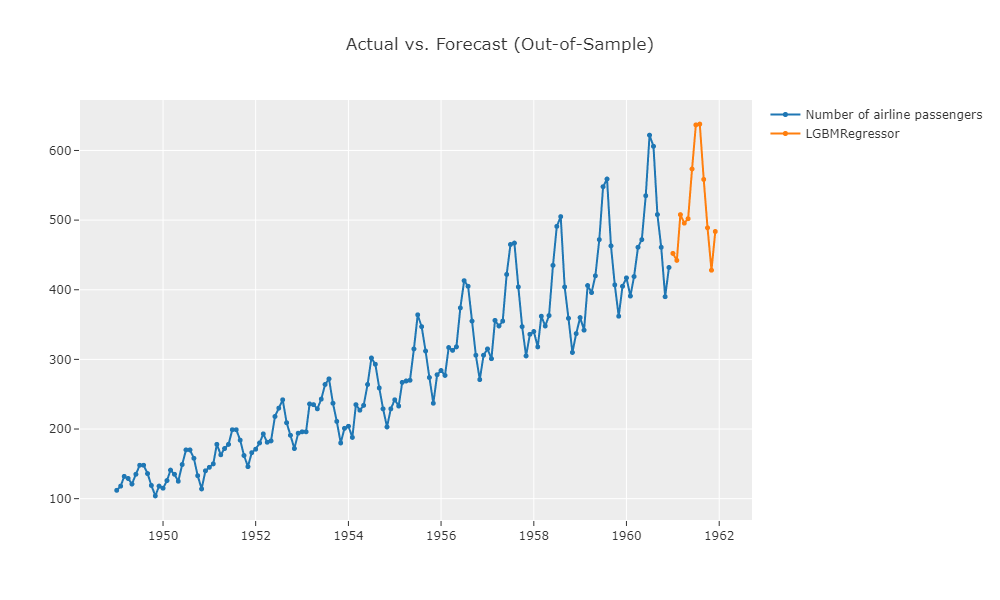

,y_pred
1961-01,452.1794
1961-02,442.2188
1961-03,507.8725
1961-04,495.6355
1961-05,502.0727
1961-06,573.4596
1961-07,636.7021
1961-08,637.8523
1961-09,558.5107
1961-10,488.9473


In [21]:
# Trains the model with the best hyperparameters on the entire dataset now
final_model = exp.finalize_model(tuned_model)
exp.plot_model(final_model)
exp.predict_model(final_model)

In [22]:
print(tuned_model)
print(final_model)

BaseCdsDtForecaster(degree=2, deseasonal_model='multiplicative',
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(bagging_freq=5, colsample_bytree=1,
                                            learning_rate=0.0025551361408324464,
                                            max_depth=8, min_child_samples=78,
                                            n_estimators=224, num_leaves=253,
                                            random_state=42,
                                            reg_alpha=3.144127709026421e-10,
               

**Observations:**
As we can see, the model hyperparameters are exactly the same. The only difference is that the `tuned_model` has been trained only using the training dataset, while the `final_model` has been trained using the full dataset.

We can also plot the two models simultaneously to check the forecasts. Since the `tuned_model` has been trained on the train dataset only, it makes forecasts for the test dataset. Since the `final_model` has been trained on the entire dataset, it makes true futute predictions. 

### Save model pickle file

Now, we can save this model as a pickle file. This model can then be loaded later for making predictions again.

In [23]:
_ = exp.save_model(final_model, "my_final_model")

Transformation Pipeline and Model Successfully Saved


## Load Model 

Now, let's say you closed your training session but want to make the predictions with the saved model. This can be done easily by loading the model again (usually done in another session)

In [24]:
exp_load = TSForecastingExperiment()
loaded_model = exp_load.load_model("my_final_model")

Transformation Pipeline and Model Successfully Loaded


In [25]:
# Should match predictions from before the save and load
exp_load.predict_model(loaded_model)

,y_pred
1961-01,452.1794
1961-02,442.2188
1961-03,507.8725
1961-04,495.6355
1961-05,502.0727
1961-06,573.4596
1961-07,636.7021
1961-08,637.8523
1961-09,558.5107
1961-10,488.9473


These predictions match with the ones we got before we saved the model.

Another use case is that the user may want to forecast for a longer horizon than the one used for the original training. This can be achieved as follows

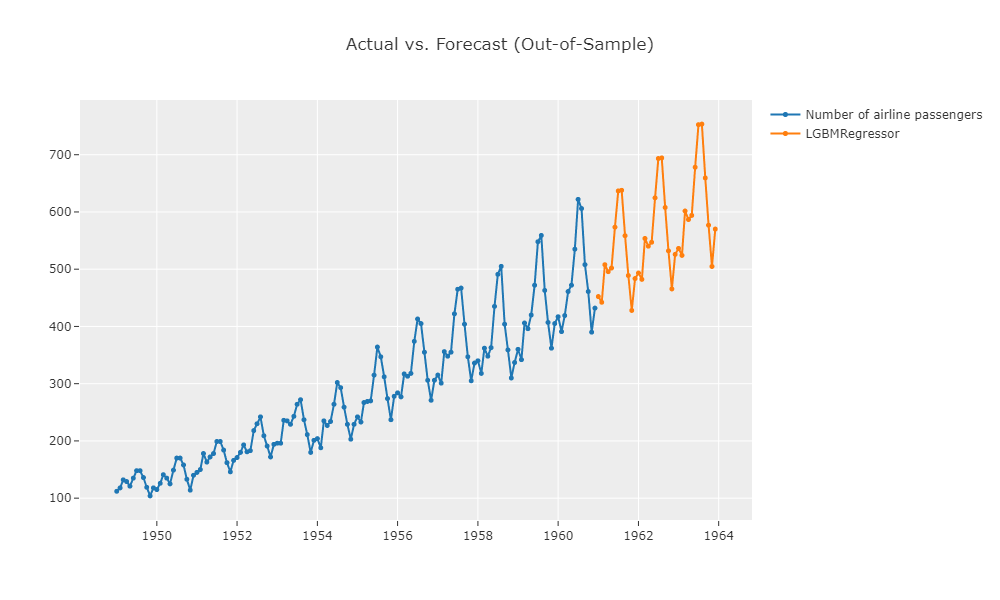

In [26]:
# Example here shows forecasting out 36 months instead of the default of 12
exp.plot_model(estimator=final_model, data_kwargs={'fh': 36}) 

Users may also be interested in learning about Multi-step forecasts. More details about this can be **[found here](https://github.com/pycaret/pycaret/discussions/1942)**.

**That's it for this notebook. In the next notebook, we will see a more automate way to model this same data.**